# Global AI Hub - Python Bootcamp - Proje 2

(Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

- Verilen datasetle ilgili pandas, numpy ve matplotlib kullanılarak analizlerin elde edildiği bir projedir.

## Kullanılacak Kütüphanelerin Import Edilmesi

In [1]:
import matplotlib.pyplot as plt
import datetime
from collections import OrderedDict
import numpy as np
import pandas as pd
import seaborn as sns

## Verisetinin Okunup Dataframe Çevrilip Analize Hazır Hale Getirilmesi

In [2]:
# encoding changed to ISO-8859-1 because utf-8 is not reading.
netflix_dataframe = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
netflix_dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


## Dataframe Hakkında Bilgi Edinme ve Gerekli Dönüşünlerin Sağlanması

- .info() ile tüm sütunlar hakkında kısaca bilgi edindim.
- Tarih ile ilgili sütun olan Premiere sütununu object yerine date olarak çevirerek tarih olarak kullanılabilir hale getirdim.
- Film süreesi ile ilgili sütun olan Runtime sütununu dakika cinsinden çıkarıp saniye cinsine çevirdim. Yapmamın sebebi dakika olarak toplandığında her 60 dakika 1 saate eşitken her 100 saniye 1 dakika eşittir. Bu yüzden toplama yaparken daha kolay toplanıp sonrasında dakika veya saat cinsine kolaylıkla çevrilebilir.
- Sütun isimlerine istenilen zamanda bakılabilmesi için sütun isimlerinin çıktısını aldım.

In [3]:
netflix_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
netflix_dataframe["Premiere"] = pd.to_datetime(netflix_dataframe["Premiere"]).dt.date
netflix_dataframe["Runtime"] = [i*60 for i in netflix_dataframe["Runtime"]]
netflix_dataframe  # to see changed column's data in dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,3480,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,4860,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,4740,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,5640,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,5400,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,7500,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,5460,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,9180,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,5340,8.6,Portuguese


In [5]:
# to see column names
netflix_dataframe.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

## 1. Soru, Yapılanlar ve Yorum
### Soru
- Verisetine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
### Yapılanlar
- Slicing ve condition kullanarak uzun metraj sayılan filmleri (minimum 40 dakika olan filmler) bir dataframede topladım.
- Sonrasında da Language sütunu üstünden her bir dilde kaç tane filmin olduğunu .value_counts() metodunu kullanarak saydırdım.
- Direkt pasta grafiğiyle oluşturduğumda uzun bir legend ve pastada minimal parçalar gözükmesinden hepsinin toplamına göre yüzdeliğini alarak %3'ün üstünde olanları tekil diğerlerini ise toplayıp Others olarak yani Diğerleri olarak gösterdim.

In [6]:
# long films are categorized as minimum 40 minutes.
long_films_dataframe = netflix_dataframe[netflix_dataframe["Runtime"] >= 40]
long_films_dataframe

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,3480,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,4860,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,4740,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,5640,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,5400,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,7500,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,5460,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,9180,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,5340,8.6,Portuguese


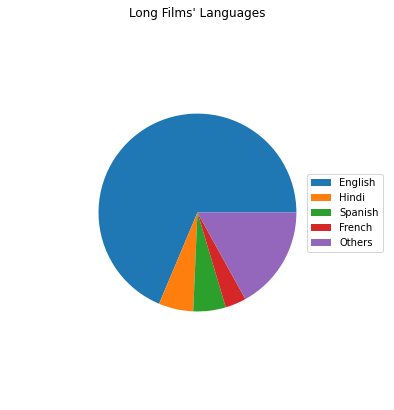

In [7]:
long_film_language_dictionary = dict(long_films_dataframe["Language"].value_counts())

value_mean_list = [(i / sum(list(long_film_language_dictionary.values()))) * 100 for i in list(long_film_language_dictionary.values())]

values = []
names = []
total_others = 0
for i in range(len(value_mean_list)):
    if value_mean_list[i] > 3:
        values.append(value_mean_list[i])
        names.append(list(long_film_language_dictionary)[i])
    else:
        total_others += value_mean_list[i]

names.append("Others")
values.append(total_others)

fig = plt.figure(figsize=(7,7))
plt.pie(values, radius=0.65)
plt.legend(names, loc="right")
plt.title("Long Films' Languages")
plt.xticks(rotation=90)
plt.show()

### Yorum

- İngilizcenin Netflix'de bulunan uzun metrajlı filmler arasında en çok kullanılan dil olduğu görülmektedir. Bunun sebebi hem Netflix'in Amerika'da kurulan bir şirket olması ve sonrasında globale açılması hem de dünya genelinde en çok kullanılan dil olmasından dolayıdır. 
- Sonraki sıralarda gelen Hintçe ve İspanyolca ise yine en çok kullanılan diller arasında bulunmasından dolayı olabilir.

## 2. Soru, Yapılanlar ve Yorum
### Soru
- 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
### Yapılanlar
- İlk olarak Genre sütunu üstünden Documentary türündeki filmleri topladım.
- Daha öncesinde date çevirdiğim Premiere sütunu üstünden 01-01-2019 ile 30-06-2020 tarihleri arasındaki belgesel türündeki filmleri ayırdım. Sonrasında Premiere sütununa göre artan sıralı sıralama yaptım.
- Sonrasında Title sütununu x eksenine aldıkları IMDB Score'larını da y eksenine koyarak her bir filmin ismini ve puanını gösteren scatter grafiği oluşturdum.

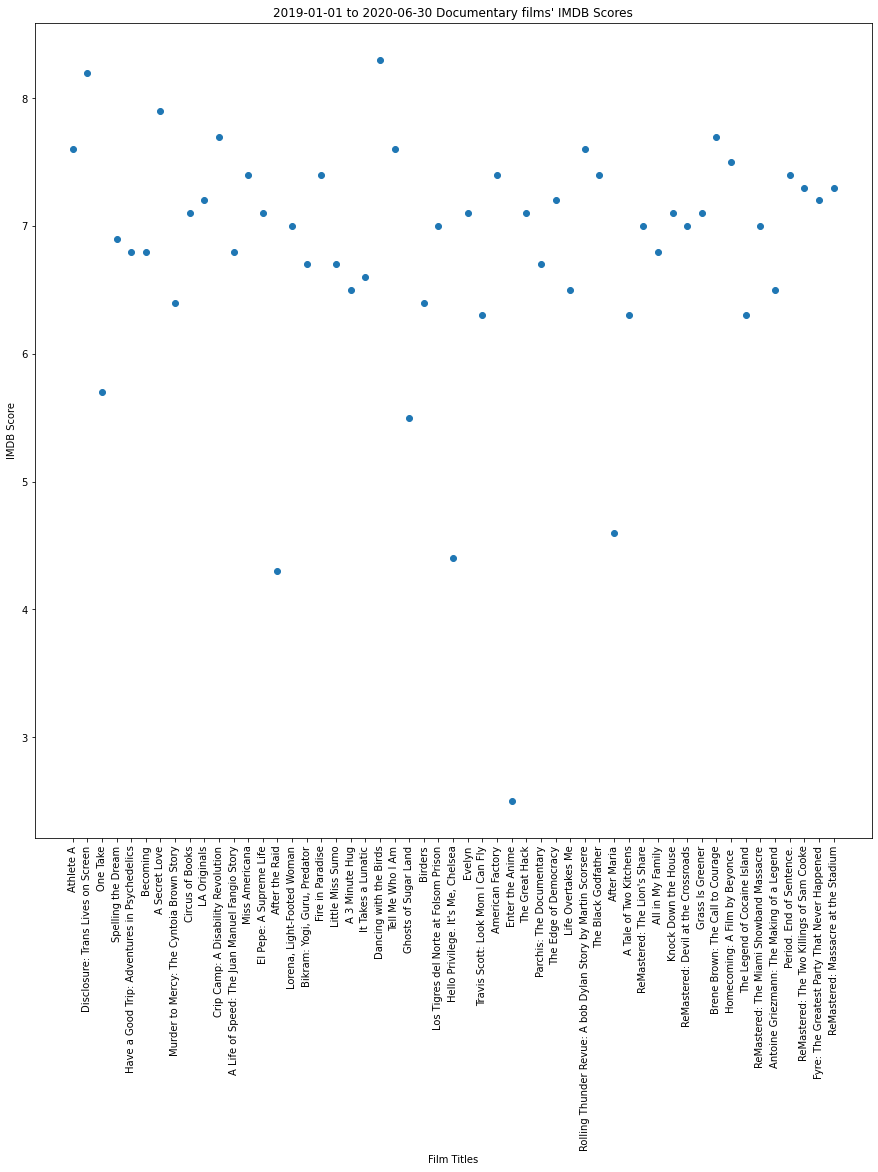

In [8]:
documentary_2019_2020_dataframe = netflix_dataframe[netflix_dataframe["Genre"] == "Documentary"]
first_date = datetime.date(2019,1,1)
second_date = datetime.date(2020,6,30)
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe[documentary_2019_2020_dataframe["Premiere"]>= first_date]
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe[documentary_2019_2020_dataframe["Premiere"]<= second_date]
documentary_2019_2020_dataframe = documentary_2019_2020_dataframe.sort_values("Premiere", ascending=False, ignore_index=True)

fig = plt.figure(figsize=(15,15))
plt.scatter(documentary_2019_2020_dataframe["Title"], documentary_2019_2020_dataframe["IMDB Score"])
plt.title("2019-01-01 to 2020-06-30 Documentary films' IMDB Scores")
plt.xticks(rotation=90)
plt.xlabel("Film Titles")
plt.ylabel("IMDB Score")
plt.show()


## Yorum
- Grafiğe bakıldığında birkaç tane aykırı değerin olduğu görülmektedir. Bunlar 6'ın altında alıp genel tabirle vasat sayılan filmlerdir.
- Genel olarak ortalamaya bakıldığında ise IMDB puanı 7 etrafında dağılmaktadır. Belirtilen tarihler aralığında genel tabirle ortalama iyi filmlerin çıktığı görülmektedir.

## 3. Soru, Yapılanlar ve Yorum
### Soru
- İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
### Yapılanlar
- Sadece İngilizce olan filmleri condition ile bir dataframede topladım.
- Her bir türün bulunduğu listeyi çıkardım ve tür bazlı IMDB puanlarının ortalamasının olduğu liste yaptım.
- En yüksek puana sahip olanın indexini bulup tür listesinden ismini çekerek ekrana yazdım.

In [9]:
only_english_dataframe = netflix_dataframe[netflix_dataframe["Language"] == "English"]
genres_list = list(dict(only_english_dataframe["Genre"].value_counts()).keys())
mean_list = [only_english_dataframe[only_english_dataframe["Genre"] == i]["IMDB Score"].mean() for i in genres_list]

highest_genre = genres_list[mean_list.index(max(mean_list))]
print(f"Highest Only English Film Genre is {highest_genre}")

Highest Only English Film Genre is Animation/Christmas/Comedy/Adventure


### Yorum
- Çıktıya bakıldığında sadece İngilizce'de en yüksek ortalamaya puana sahip olan Animation/Christmas/Comedy/Adventure türüdür. Bunun nedeni 7'den 70'e herkese hitap eden eğlenceli, komik ve noel zamanını çağırdığı ve o zamanda izlendiğinden insanlar mutlu olduklarında daha yüksek puan verdiklerinden olmaktadır.
- Bir diğer neden burda bu alanda çekilen film sayısı olabilir. Çünkü ortalama sayıda film çekilip yüksek puan almış olabilirlerken başka bir türde çok fazla film çekilip vasat filmlerin sayısı iyi filmlerin sayısından fazlaysa ortalamanın aşağıya doğru çekilmesi normaldir.
- Bunun önüne tür bazlı aykırılıklara bakılabilir ve onların temizlenmesi dâhilindeki duruma bakılabilir.

## 4. Soru, Yapılanlar ve Yorum
### Soru
- 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
### Yapılanlar
- Sadece Hintçe olan filmleri condition ile bir dataframede topladım.
- Runtime sütununun ortalamasını alarak genel Hintçe filmlerin ortalama film süresini buldum.

In [10]:
only_hindi_dataframe = netflix_dataframe[netflix_dataframe["Language"] == "Hindi"]
average_runtime_hindi = only_hindi_dataframe["Runtime"].mean()
print(f"Average Hindi Films Runtime is {average_runtime_hindi:.2f} in seconds.")
print(f"Average Hindi Films Runtime is {average_runtime_hindi/60:.0f} in minutes.")

Average Hindi Films Runtime is 6947.27 in seconds.
Average Hindi Films Runtime is 116 in minutes.


### Yorum
- Çıktıya bakıldığında ortalama 116 dakika uzunluğunda olduğu görülmektedir. Ortalama film süresi yaklaşık 120 dakika olduğu günümüzde normal bir süre olduğu görülmektedir.

## 5. Soru, Yapılanlar ve Yorum
### Soru
- 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
### Yapılanlar
- Görselleştirme kolaylığı olsun diye tür (genre) sütununda tür bazlı kaç filmin olduğunun dictionarysini oluşturdum.
- Toplam tür sayısını ve tüm türleri ekrana yazdırmak için her satırda 5 tane tür olacak şekilde ekrana bastırdım.
- Direkt pasta grafiğiyle oluşturduğumda uzun bir legend ve pastada minimal parçalar gözükmesinden hepsinin toplamına göre yüzdeliğini alarak %3'ün üstünde olanları tekil diğerlerini ise toplayıp Others olarak yani Diğerleri olarak gösterdim.

Genre sütununda toplamda 115 kategori vardır.
Verisetinde bulunan film türleri: (Her satırda 5 tane tür vardır.)
Documentary, Drama, Comedy, Romantic comedy, Thriller
Comedy-drama, Crime drama, Biopic, Horror, Action
Romance, Concert Film, Aftershow / Interview, Animation, Action comedy
Romantic drama, Psychological thriller, Science fiction/Thriller, Variety show, Science fiction
Animation / Short, Action-thriller, Sports-drama, One-man show, Horror thriller
Western, Science fiction/Drama, Dark comedy, Satire, War drama
Family, Spy thriller, Anime/Science fiction, Mystery, Black comedy
Musical comedy, Comedy / Musical, Musical, Family film, Making-of
Superhero, Adventure, Horror-thriller, War, Mockumentary
Teen comedy horror, Family/Christmas musical, Science fiction/Action, Animation/Musical/Adventure, Animation / Musicial
Animation/Comedy/Adventure, Crime thriller, Action thriller, Family/Comedy-drama, Teen comedy-drama
Science fiction thriller, Christmas/Fantasy/Adventure/Comedy, M

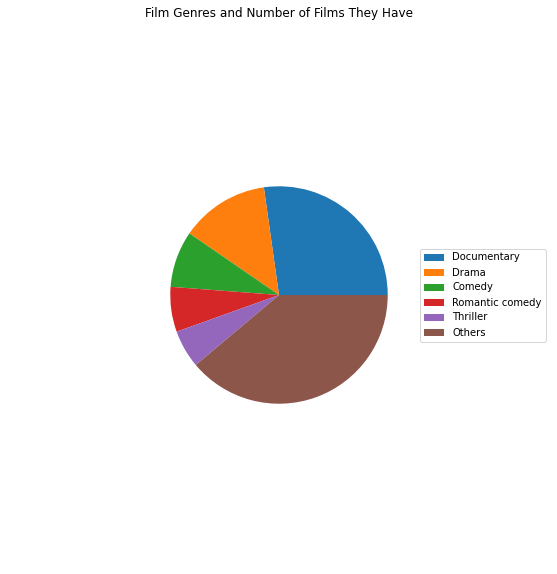

In [11]:
genre_dictionary = dict(netflix_dataframe["Genre"].value_counts())

print(f"Genre sütununda toplamda {len(genre_dictionary)} kategori vardır.")
print("Verisetinde bulunan film türleri: (Her satırda 5 tane tür vardır.)")
keys_list = list(genre_dictionary.keys())
for i in range(4, len(keys_list), 5):
    print(f"{keys_list[i-4]}, {keys_list[i-3]}, {keys_list[i-2]}, {keys_list[i-1]}, {keys_list[i]}")

value_mean_list = [(i / sum(list(genre_dictionary.values()))) * 100 for i in list(genre_dictionary.values())]

values = []
names = []
total_others = 0
for i in range(len(value_mean_list)):
    if value_mean_list[i] > 3:
        values.append(value_mean_list[i])
        names.append(list(genre_dictionary)[i])
    else:
        total_others += value_mean_list[i]

names.append("Others")
values.append(total_others)

fig = plt.figure(figsize=(10, 10))
plt.pie(values, radius=0.5)
plt.legend(names, loc="right")
plt.title("Film Genres and Number of Films They Have")
plt.show()

### Yorum
- Bakıldığında en fazla belgesel türünde film yapılmıştır.

## 6. Soru, Yapılanlar ve Yorum
### Soru
- Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
### Yapılanlar
- .value_counts() ile dil bazlı hangi dil kaç filmde olduğunu buldum.
- Dictionary'e sıralı geldiğinden dolayı ilk 3'ü bastıran for döngüsü oluşturdum.

In [12]:
language_dictionary = dict(netflix_dataframe["Language"].value_counts())

print("Top 3 highest languages used in films with its number:")
for i in range(3):
    language = list(language_dictionary.keys())[i]
    print(language, language_dictionary[language])



Top 3 highest languages used in films with its number:
English 401
Hindi 33
Spanish 31


### Yorum
- Çıktıya baktığımızda daha önce uzun metraj filmlerinde dil bazlı baktığımızdaki sonuçla benzer sonucu elde ettik. İlk 3 sırasıyla İngilizce, Hintçe ve İspanyolcadır.

## 7. soru, Yapılanlar ve Yorum
### Soru
- IMDB puanı en yüksek olan ilk 10 film hangileridir?
### Yapılanlar
- Dataframe'i IMDB Score sütununa göre satırları azalan sırayla sıraladım.
- Sonrasında ilk 10 filmi bastırdım.

In [13]:
highest_IMDB_dataframe = netflix_dataframe.sort_values("IMDB Score", axis=0, ascending=False)
print("Highest IMDB Score Films")
highest_IMDB_dataframe.head(10)

Highest IMDB Score Films


,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,4980,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,5340,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,9180,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,5460,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,7500,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,5100,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,3060,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,6840,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,5820,8.2,English
571,13th,Documentary,2016-10-07,6000,8.2,English


### Yorum
- Çıktıya bakıldığında daha önceden elde ettiğimiz çok fazla İngilizce filmin bulunmasından dolayı 1 film harici tüm filmlerde İngilizce bulunmaktadır.
- En yüksek puanlı filmse 9.0 puanla dünyanın görülmemiş yerlerini ziyaret edilip anlatıldığı bir belgeseldir.

## 8. Soru, Yapılanlar ve Yorum
### Soru
- IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
### Yapılanlar
- IMDB Score'unun Runtime arasındaki korelasyonunu çıkarmak için .corr() metodunu kullandım.

The correlation between IMDB Score and Runtime is -0.040896291420788565


<AxesSubplot:>

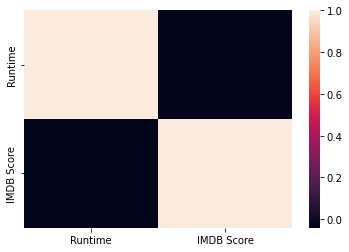

In [14]:
print(f"The correlation between IMDB Score and Runtime is {netflix_dataframe['IMDB Score'].corr(netflix_dataframe['Runtime'])}")
sns.heatmap(netflix_dataframe.corr())

### Yorum
- 0.5'ten küçük ve nerdeyse sıfır olmasından dolayı aralarında korelasyon olduğu söylenemez.

## 9. Soru, Yapılanlar ve Yorum
### Soru
- IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
### Yapılanlar
- İlk olarak türlerin listesini oluşturdum. Sonra tür bazlı ortalamalarını bulup bir listeye attım.
- Ortalamaların key olduğu türlerin value olduğu dictionary oluşturup OrderedDict kullanarak büyükten küçüğe sıralamasını yaptım.
- Sonrasında for döngüsüyle en yüksek 10 türü ve puanlarının olduğu 2 tane liste oluşturdum.
- Scatter grafiği ile de görselleştirmesini yaptım.

Top 10 Highest IMDB Scores by Genres
Animation/Christmas/Comedy/Adventure 8.20
Musical / Short 7.70
Concert Film 7.63
Anthology/Dark comedy 7.60
Animation / Science Fiction 7.50
Making-of 7.45
Action-adventure 7.30
Drama-Comedy 7.20
One-man show 7.13
Animation / Short 7.12



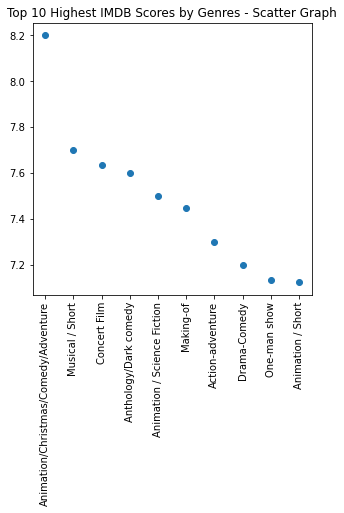

In [15]:
genres_list = list(dict(netflix_dataframe["Genre"].value_counts()).keys())
mean_list = [netflix_dataframe[netflix_dataframe["Genre"] == i]["IMDB Score"].mean() for i in genres_list]

highest_genre_score_dictionary = dict(zip(mean_list, genres_list))
highest_genre_score_dictionary = OrderedDict(sorted(highest_genre_score_dictionary.items(), reverse=True))

count = 0
highest_genres_list = []
highest_scores_list = []
print("Top 10 Highest IMDB Scores by Genres")
for i in highest_genre_score_dictionary:
    count += 1
    if count <= 10:
        highest_genres_list.append(highest_genre_score_dictionary[i])
        highest_scores_list.append(i)
        print(f"{highest_genre_score_dictionary[i]} {i:.2f}")
    else:
        break
print()

fig = plt.figure(figsize=(5,5))
plt.scatter(highest_genres_list, highest_scores_list)
plt.title("Top 10 Highest IMDB Scores by Genres - Scatter Graph")
plt.xticks(rotation=90)
plt.show()

### Yorum
- Bakıldığında türler arasında komedi içeren türler yüksek ortalamalara sahip olduğunu görmekteyiz. Komik şeyler izlemesi insanların daha yüksek puan vermesini sağlıyor diyebiliriz.

## 10. Soru, Yapılanlar ve Yorum
### Soru
- 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
### Yapılanlar
- Runtime sütununa göre büyükten küçüğe tüm satırları sıraladığım bir dataframe oluşturdum.
- Sonrasında en yüksek ilk 10'u kapsayan bir scatter grafiği oluşturdum.

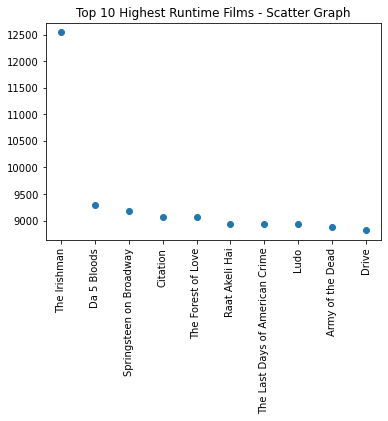

In [16]:
highest_runtime_dataframe = netflix_dataframe.sort_values("Runtime", axis=0, ascending=False)
#fig = plt.figure(figsize=(7,3))
plt.scatter(highest_runtime_dataframe["Title"][:10], highest_runtime_dataframe["Runtime"][:10])
plt.title("Top 10 Highest Runtime Films - Scatter Graph")
plt.xticks(rotation=90)
plt.show()


### Yorum
- Bakıldığında The Irishman en uzun süreye sahip geri kalanlar ise 9000 ile 9500 saniye arasında dağılmaktadır.

## 11. Soru, Yapılanlar ve Yorum
### Soru
- Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
### Yapılanlar
- Yıl bazlı kaç tane filmin olduğu dictionary oluşturup onu yıllara göre sıraladım.
- Sonrasında bar grafiğiyle görselleştirmesini yaptım.
- En sonda da hangi yılın en yüksek olduğunu ve kaç film olduğunu ekrana bastırdım.

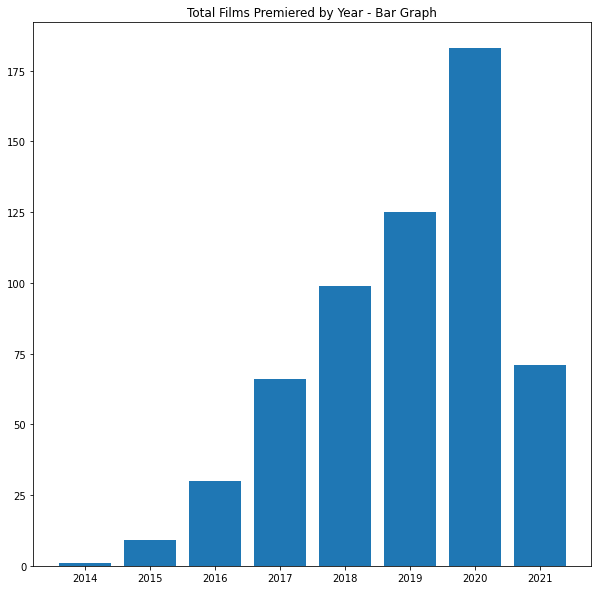

Highest Number of Films made in 2020 with 183 films


In [17]:
highest_film_year_dictionary = dict(pd.DatetimeIndex(netflix_dataframe["Premiere"]).year.value_counts())

highest_film_year_dictionary = OrderedDict(sorted(highest_film_year_dictionary.items(), reverse=True))
fig = plt.figure(figsize=(10,10))
plt.bar(list(highest_film_year_dictionary.keys()), list(highest_film_year_dictionary.values()))
plt.title("Total Films Premiered by Year - Bar Graph")
plt.show()

highest_year_index = list(highest_film_year_dictionary.values()).index(max(highest_film_year_dictionary.values()))
highest_year_index = list(highest_film_year_dictionary.keys())[highest_year_index]
print(f"Highest Number of Films made in {highest_year_index} with {max(highest_film_year_dictionary.values())} films")

### Yorum
- 2020 yılında en yüksek film sayısına ulaşıldığını görmüş bulunmaktayız.
- Bunun nedeni filmlerin çekim sürelerinin 1 yıl ve üzeri olması ve 2020 yılında pandeminin başlamasıyla film çekimlerine ara verildi.
- Ara verilmesinden sonra çok hızlı yükseliş ardına her alanda olduğu gibi bir anda film sayılarında da düşüş gerçekleşti.

## 12. Soru, Yapılanlar ve Yorum
### Soru
- Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
### Yapılanlar
- Dillerin unique olarak toplandığı bir liste oluşturdum ve bunların ortalama IMDB puanlarının olduğu ortalama listesi oluşturdum.
- Sonrasında en düşük olanı ekrana bastırdım ve tüm dillerin ortalama IMDB puanlarının olduğu bir scatter grafiği ortaya koydum.

Lowest Average IMDB Score by Language is Malay with 4.2 



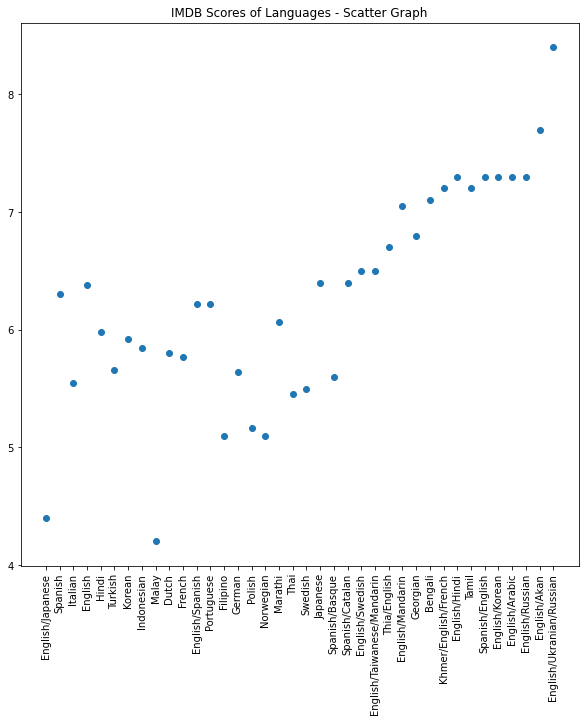

In [18]:
language_list = list(netflix_dataframe["Language"].unique())
mean_list = [netflix_dataframe[netflix_dataframe["Language"] == i]["IMDB Score"].mean() for i in language_list]

print(f"Lowest Average IMDB Score by Language is {language_list[mean_list.index(min(mean_list))]} with {min(mean_list)} \n")
fig = plt.figure(figsize=(10,10))
plt.scatter(language_list, mean_list)
plt.title("IMDB Scores of Languages - Scatter Graph")
plt.xticks(rotation=90)
plt.show()

### Yorum
- En düşük ortalama puana Malayca sahip. Burdan film alanında daha gelişmediklerini söylebiliriz.

## 13.Soru, Yapılanlar ve Yorum
### Soru
- Hangi yılın toplam "runtime" süresi en fazladır?
### Yapılanlar
- Yılların bulunduğu bir liste oluşturup Runtimeların toplamının olduğu yeni bir liste daha oluşturdum.
- Sonrasında max total süreyi bularak onun indexindeki yılı çektim. Toplam süreyi ve yılı ekrana bastırdım.

In [19]:
year_dictionary = list(pd.DatetimeIndex(netflix_dataframe["Premiere"]).year.unique())
total_runtime_list = [netflix_dataframe[pd.DatetimeIndex(netflix_dataframe["Premiere"]).year == i]["Runtime"].sum() for i in year_dictionary]

print(f"Maximum Total Runtime is {max(total_runtime_list)} in {year_dictionary[total_runtime_list.index(max(total_runtime_list))]}")

Maximum Total Runtime is 1043040 in 2020


### Yorum
- 2020 yılının en yüksek süreye sahip olduğunu görmekteyiz. Bunun sebebi çok fazla sayıda filmin olması diyebiliriz.

## 14. Soru, Yapılanlar ve Yorum
### Soru
- Her bir dilin en fazla kullanıldığı "Genre" nedir?
### Yapılanlar
- Dillerin olduğu bir liste oluşturarak her dilde hangi türde kaç film yapıldığını tutan bir temp listesi oluşturdum.
- Sonrasında temp listesinin en yüksek sayısını bularak onun indexi ve ona karşılık gelen türü döngü öncesi oluşturduğum dictionary içine attım.
- Sonrasında zip fonksiyonunu kullanarak sırasıyla hangi dilde en çok hangi türde kaç tane film yapıldığını ekrana bastırdım.

In [20]:
language_list = list(netflix_dataframe["Language"].unique())
highest_language_used_by_genre_dictionary = {}

for i in language_list:
    temp = netflix_dataframe[netflix_dataframe["Language"] == i]["Genre"].value_counts()
    highest_number_temp = max(temp)
    temp1 = list(temp).index(highest_number_temp)
    temp2 = list(temp.keys())
    highest_genre_temp = temp2[temp1]
    highest_language_used_by_genre_dictionary[i] = [highest_genre_temp, highest_number_temp]

for j,k in zip(highest_language_used_by_genre_dictionary.keys(), highest_language_used_by_genre_dictionary.values()):
    print(f"In {j}, most used genre is {k[0]} with  {k[1]}")


In English/Japanese, most used genre is Documentary with  1
In Spanish, most used genre is Documentary with  8
In Italian, most used genre is Drama with  4
In English, most used genre is Documentary with  120
In Hindi, most used genre is Drama with  13
In Turkish, most used genre is Comedy with  2
In Korean, most used genre is Drama with  2
In Indonesian, most used genre is Drama with  3
In Malay, most used genre is Action comedy with  1
In Dutch, most used genre is Romantic comedy with  1
In French, most used genre is Documentary with  6
In English/Spanish, most used genre is Documentary with  5
In Portuguese, most used genre is Comedy with  6
In Filipino, most used genre is Drama with  1
In German, most used genre is Thriller with  1
In Polish, most used genre is Horror with  1
In Norwegian, most used genre is Horror with  1
In Marathi, most used genre is Drama with  2
In Thai, most used genre is Horror with  1
In Swedish, most used genre is Thriller with  1
In Japanese, most used ge

### Yorum
- Genel olarak bakıldığında bolca Documentary türü görülmektedir. Bunun nedeni çekilmesi kolay olduğu ve uzun veya kısa süreli olabilmesinden dolayı olabilir.
- Aynı zamanda herkes kendi çevresiyle ilgili bir belgesel çekmek dünyaya anlatmak istemsinden dolayı da olabilir.

## 15. Soru, Yapılanlar ve Yorum
### Soru
- Veri setinde outlier veri var mıdır? Açıklayınız.
### Yapılanlar
- Runtime ve IMDB scorelarının sayısal ve anlamlı olmasından dolayı outlier tespitinde kullandım.
- Outlier tespiti için boxplot grafiği kullandım.

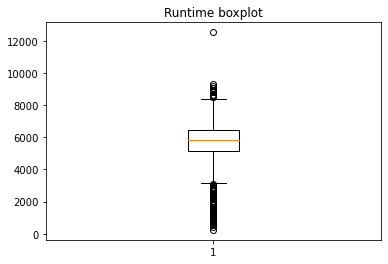

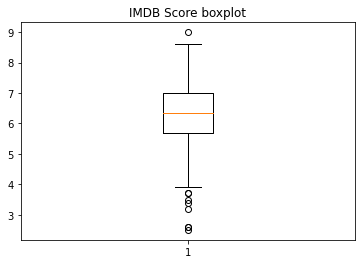

In [21]:
plt.boxplot(netflix_dataframe["Runtime"])
plt.title("Runtime boxplot")
plt.show()
plt.boxplot(netflix_dataframe["IMDB Score"])
plt.title("IMDB Score boxplot")
plt.show()

### Yorum
- Her iki alanda da outlier veri bulunmaktadır. İkisinde de üst limitte 1 veya çok az denebilecek kadar outlier veri olduğu görülmektedir. Runtime'daki en üst outlierı 2019'de çıkan The Irishman'dir. Aynı şekilde IMDB Score'unda ise David Attenborough: A Life on Our Planet belgeselidir.
- Alt limite bakıldığında ise fazla outlier veri bulunduğu görülmektedir.
- Bunların temizlenmesi daha iyi sonuçlar ortaya koyabileceğini düşünmekteyim. Çünkü genel olarak Runtime'ı düşük olanlar kısa belgesel, röportaj veya kamera arkası gibi filmlerdir.
- Aynı şekilde IMDB Score'unda ise temizlenmesi ortalama ve medyanı biraz daha yukarı itebileceğini ve ortalama iyi puana sahip denen 7'ye yaklaştırabilir.